<a href="https://colab.research.google.com/github/Srinidhi-45/Air-Quality-Prediction-Model-by-LSTM/blob/main/Air_Quality_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.6027 - val_loss: 0.0493
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.5208 - val_loss: 0.0149
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.4384 - val_loss: 3.7498e-04
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.2317 - val_loss: 0.0077
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.1843 - val_loss: 0.0399
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1268 - val_loss: 0.1010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0515 - val_loss: 0.1894
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0293 - val_loss: 0.3043
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.0706 - val_loss: 0.4008
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0666 - val_loss: 0.4655
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.1382 - val_loss: 0.4705
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1432 - val_loss: 

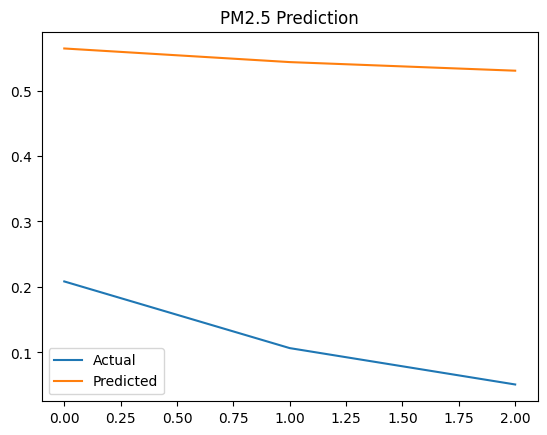

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming 'air_quality_data.csv' is in the same directory as the script
# If not, replace with the actual path
data = pd.read_csv('air_quality_data.csv', parse_dates=['date'])

# Use the actual column names from your CSV
data = data[['date', 'PM2.5', 'TEMP', 'PRES', 'DEWP']].dropna() # Changed column names here
data = data.sort_values('date')
data.set_index('date', inplace=True)
# Rename columns to match your original code's expectations if needed
data = data.rename(columns={'PM2.5': 'pm2_5', 'TEMP': 'temperature', 'PRES': 'humidity', 'DEWP': 'wind_speed'}) #Rename if needed

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)



def create_sequences(data, seq_len):
    X, y = [], []
    # The lines within the for loop need to be indented
    for i in range(len(data) - seq_len):
        X.append(data.iloc[i:i+seq_len].values)
        y.append(data.iloc[i+seq_len]['pm2_5'])
    return np.array(X), np.array(y)

# Reduced seq_length to 12 to allow for sequence creation with the available data
seq_length = 12
X, y = create_sequences(scaled_data, seq_length)
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]



model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

#Evaluate and Visualize

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}, RMSE: {rmse}")
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('PM2.5 Prediction')
plt.show()

In [ ]:
import pandas as pd

# Sample CSV data as a multi-line string
csv_data = """date,PM2.5,TEMP,PRES,DEWP
2017-01-01 00:00:00,129.0,5.0,1019.0,-5.0
2017-01-01 01:00:00,148.0,4.9,1019.0,-5.2
2017-01-01 02:00:00,159.0,4.8,1018.0,-5.3
2017-01-01 03:00:00,181.0,4.7,1018.0,-5.5
2017-01-01 04:00:00,197.0,4.6,1018.0,-5.8
2017-01-01 05:00:00,211.0,4.4,1017.0,-6.0
2017-01-01 06:00:00,236.0,4.3,1017.0,-6.2
2017-01-01 07:00:00,265.0,4.1,1016.0,-6.5
2017-01-01 08:00:00,289.0,4.0,1016.0,-6.8
2017-01-01 09:00:00,310.0,3.9,1015.0,-7.0
2017-01-01 10:00:00,322.0,3.8,1015.0,-7.2
2017-01-01 11:00:00,334.0,3.7,1015.0,-7.3
2017-01-01 12:00:00,345.0,3.6,1014.0,-7.5
2017-01-01 13:00:00,341.0,3.8,1013.0,-7.1
2017-01-01 14:00:00,330.0,4.1,1012.0,-6.8
2017-01-01 15:00:00,319.0,4.5,1011.0,-6.3
2017-01-01 16:00:00,302.0,5.0,1010.0,-6.0
2017-01-01 17:00:00,278.0,5.5,1009.0,-5.6
2017-01-01 18:00:00,250.0,6.0,1008.0,-5.0
2017-01-01 19:00:00,220.0,6.4,1008.0,-4.5
2017-01-01 20:00:00,198.0,6.7,1007.0,-4.2
2017-01-01 21:00:00,174.0,6.8,1007.0,-4.0
2017-01-01 22:00:00,152.0,6.9,1007.0,-3.8
2017-01-01 23:00:00,140.0,6.8,1006.0,-3.5"""

# Save it to a CSV file
with open("air_quality_data.csv", "w") as f:
    f.write(csv_data)

# Load the CSV into a DataFrame
df = pd.read_csv("air_quality_data.csv", parse_dates=["date"])

# Display the first few rows
print(df.head())


                 date  PM2.5  TEMP    PRES  DEWP
0 2017-01-01 00:00:00  129.0   5.0  1019.0  -5.0
1 2017-01-01 01:00:00  148.0   4.9  1019.0  -5.2
2 2017-01-01 02:00:00  159.0   4.8  1018.0  -5.3
3 2017-01-01 03:00:00  181.0   4.7  1018.0  -5.5
4 2017-01-01 04:00:00  197.0   4.6  1018.0  -5.8
